In [1]:
from packages.modules import *
from scipy import interpolate
# from copy import copy
from copy import deepcopy

C:\Users\delbe\OneDrive\Desktop\eCallistoValidation\Scripts\packages\..\radiospectra\radiospectra\version.py:12: UserWarning: could not determine radiospectra package version; this indicates a broken installation
  warnings.warn(


0 channels eliminated
Eliminating sharp jumps between channels ...
14 channels eliminated
(3600,)
(200,)
(200, 3600)


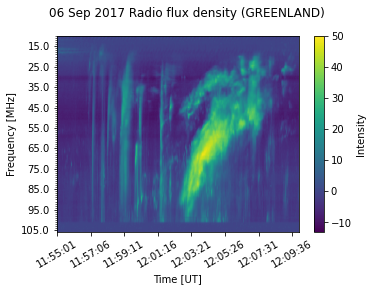

In [2]:
spec = CallistoSpectrogram.read("Spec_test//GREENLAND_20170906_115501_63.fit.gz")

# spec_copy = copy(spec)

# DeepCopy()
spec_copy = deepcopy(spec)

def interpolated_spec(self, overwrite=True):
    """ 
    Interpolate the input data and it returns a new Spectrogram.
    
    :param object self: The copy of the original Spectrogram.
    :param bool overwrite: if function interpolated_spec has been called directly, 
     there will be a possibility to overwrite it's current spectrogram data. 
    :returns: New Spectrogram with the interpolated data. 
    
    """
    
    spec_sub = self.subtract_bg("constbacksub", "elimwrongchannels")  

    # Interpolation
    time_x = spec_sub.time_axis
    freq_y = spec_sub.freq_axis
    data_z = spec_sub.data

    inter_f = interpolate.interp2d(time_x, freq_y, data_z)
    
    # the Frequency before the Interpolation
    ynew = self.freq_axis

    znew = inter_f(time_x, ynew)
    
    # If overwrite= True => it will overwrite the new values into the Spec_sub.
    
    if overwrite:
        spec_sub.time_axis = time_x
        spec_sub.freq_axis = ynew
        spec_sub.data = znew[::-1]
        
        
        # Update the FITS Header history => .header.set('Card_name', 'The content')
        
        spec_sub.header.set('HISTORY', ': The Interpolate data after using the constbacksub, elimwrongchannels.' )
                 
    return spec_sub


spec_plot = interpolated_spec(spec_copy)
spec_plot.plot()
print(spec_plot.time_axis.shape)
print(spec_plot.freq_axis.shape)
print(spec_plot.data.shape)

In [3]:
spec_plot.header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                    8 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 3600 / length of data axis 1                          
NAXIS2  =                  200 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format defined in Astronomy and
COMMENT   Astrophysics Supplement Series v44/p363, v44/p371, v73/p359, v73/p365.
COMMENT   Contact the NASA Science Office of Standards and Technology for the   
COMMENT   FITS Definition document #100 and other FITS information.             
DATE    = '2017-09-06'         / Time of observation                            
CONTENT = '2017/09/06  Radio flux density, e-CALLISTO (GREENLAND)' / Title of im
ORIGIN  = 'DK      '        

In [4]:
# spec = CallistoSpectrogram.read("Spec_test//GREENLAND_20170906_115501_63.fit.gz")
# spec.plot()
# plt.show()
# spec.header

In [5]:
# spec3 = copy(spec)

# spec_sub = spec3.subtract_bg("constbacksub", "elimwrongchannels")

# data_z = spec_sub.data
# time_x = spec_sub.time_axis
# freq_y = spec_sub.freq_axis


# f = interpolate.interp2d(time_x, freq_y, data_z)

# ynew = spec3.freq_axis

# znew = f(time_x, ynew)

# plt.imshow(znew, aspect = "auto")


In [6]:
# Path = 'Spec_test'

# def get_interpolated_array(file_name):
    
#     for root, dirs, files in os.walk(Path):
#             for file in files:
#                 if file.endswith('.fit.gz'):                    
#                     if file == file_name:
                        
#                         full_path = os.path.join(root, file)
#                         spec = CallistoSpectrogram.read(full_path)
#                         spec2 = spec.subtract_bg("constbacksub", "elimwrongchannels")
                        
#                         x = spec2.time_axis
#                         print(x.shape)
                        
#                         y = spec2.freq_axis
#                         print(y.shape)
                                             
#                         z = spec2.data.data
#                         print(z.shape)
                        
#                         f = interpolate.interp2d(x, y, z)

#                         ynew = spec.freq_axis
                        
#                         znew = f(x, ynew)
#                         print(znew.shape)
                        
#                         spec2.plot()
                        
#                         plt.show()
                        
#                         plt.imshow(znew, aspect = "auto")

In [7]:
# spec = CallistoSpectrogram.read("Spec_test//GREENLAND_20170906_115501_63.fit.gz")

# spec_copy = _with_data(spec)

# def interp_spec(spec_copy, overwrite=True):
    
#     spec_sub = spec_copy.subtract_bg("constbacksub", "elimwrongchannels")  

#     # Interpolation
#     time_x = spec_sub.time_axis
#     freq_y = spec_sub.freq_axis
#     data_z = spec_sub.data

#     inter_f = interpolate.interp2d(time_x, freq_y, data_z)

#     ynew = spec_copy.freq_axis

#     znew = inter_f(time_x, ynew)

#     if overwrite:
#         spec_sub.time_axis = time_x
#         spec_sub.freq_axis = ynew
#         spec_sub.data = znew[::-1]
        
        
        
        

#     return spec_sub


# plot_spec=interp_spec(spec_copy)
# # print(plot_spec.freq_axis.shape)
# # print(plot_spec.time_axis.shape)
# # print(plot_spec.data.shape)
# # plot_spec.plot()


In [8]:
# Path = 'Spec_test' 

# def get_copy_spec(file_name):
    
#      for root, dirs, files in os.walk(Path):           
#             for file in files:               
#                 if file.endswith('.fit.gz'):                     
#                     if file == file_name: 
                        
#                         full_path = os.path.join(root, file)
                        
#                         spec = CallistoSpectrogram.read(full_path)
                        
#                         # deep copy the spectrogram
#                         spec_copy = copy(spec)
                        
#                         return spec_copy
    

    
# spec_copy = get_copy_spec("GREENLAND_20170906_115501_63.fit.gz")